## Data Cleaning for Subway Major Incidents


In [1]:
# Importing Data Libraries

In [76]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import os


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)


In [3]:
df = pd.read_csv("/Users/empressb/Desktop/NYC-subway-reliability/subwaydelays.csv")
df.head()


,month,division,line,day_type,category,count
0,2025-01-01,NaN,NaN,1,Subway Car,8
1,2025-01-01,A DIVISION,2,1,Persons on Trackbed/Police/Medical,2
2,2025-01-01,A DIVISION,2,1,Signals,1
3,2025-01-01,A DIVISION,2,1,Subway Car,1
4,2025-01-01,A DIVISION,2,1,Track,1


In [4]:
df.shape


(494, 6)

In [5]:
df.info

<bound method DataFrame.info of           month    division line  day_type                            category  count
0    2025-01-01         NaN  NaN         1                          Subway Car      8
1    2025-01-01  A DIVISION    2         1  Persons on Trackbed/Police/Medical      2
2    2025-01-01  A DIVISION    2         1                             Signals      1
3    2025-01-01  A DIVISION    2         1                          Subway Car      1
4    2025-01-01  A DIVISION    2         1                               Track      1
..          ...         ...  ...       ...                                 ...    ...
489  2025-11-01  B DIVISION    N         1                               Track      3
490  2025-11-01  B DIVISION    Q         1                             Signals      1
491  2025-11-01  B DIVISION    R         1  Persons on Trackbed/Police/Medical      2
492  2025-11-01  B DIVISION    R         1                             Signals      1
493  2025-11-01  B DIV

### Which subway lines were affected?

In [6]:
df['line'].unique()

array([nan, '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F',
       'L', 'N', 'Q', 'R', '1', 'JZ', 'M', 'G', 'S 42nd'], dtype=object)

<!-- ### Which subway lines where affected -->

### How are incidents categorized?

In [7]:
df['category'].value_counts()

Persons on Trackbed/Police/Medical    130
Signals                               127
Track                                  93
Subway Car                             64
Stations and Structure                 46
Other                                  34
Name: category, dtype: int64

### The ratio beween weekday vs Weekend balance

In [8]:
df['day_type'].value_counts()

1    441
2     53
Name: day_type, dtype: int64

### 1 = weekday and 2 = Weekend

In [9]:
df['month'] = pd.to_datetime(df['month'])

In [10]:
df['month']

0     2025-01-01
1     2025-01-01
2     2025-01-01
3     2025-01-01
4     2025-01-01
         ...    
489   2025-11-01
490   2025-11-01
491   2025-11-01
492   2025-11-01
493   2025-11-01
Name: month, Length: 494, dtype: datetime64[ns]

In [11]:
df.dtypes

month       datetime64[ns]
division            object
line                object
day_type             int64
category            object
count                int64
dtype: object

### Are there any duplicates?

In [12]:
df.duplicated().sum()

0

### Are there missing values?

In [13]:
df.isna().sum()

month       0
division    7
line        7
day_type    0
category    0
count       0
dtype: int64

In [14]:
## Missing values for division and line. 

In [15]:
## Remove missing values 

In [16]:
df['division'] = df['division'].fillna("ALL DIVISIONS")
df['line'] =df['line'].fillna("ALL LINES")

In [17]:
df.isna().sum()

month       0
division    0
line        0
day_type    0
category    0
count       0
dtype: int64

### Adding day_type column

In [18]:
df['day_type_label'] = df['day_type'].map({ 1:"Weekday", 2:"Weekend"})

In [19]:
df[['day_type', 'day_type_label']].drop_duplicates()

,day_type,day_type_label
0,1,Weekday
15,2,Weekend


### Lets add the year and month name

In [20]:
df['year'] = df['month'].dt.year
df['month_name'] = df['month'].dt.month_name()

### Lets check the dataset and all the updates

In [21]:
df.head()

,month,division,line,day_type,category,count,day_type_label,year,month_name
0,2025-01-01,ALL DIVISIONS,ALL LINES,1,Subway Car,8,Weekday,2025,January
1,2025-01-01,A DIVISION,2,1,Persons on Trackbed/Police/Medical,2,Weekday,2025,January
2,2025-01-01,A DIVISION,2,1,Signals,1,Weekday,2025,January
3,2025-01-01,A DIVISION,2,1,Subway Car,1,Weekday,2025,January
4,2025-01-01,A DIVISION,2,1,Track,1,Weekday,2025,January


## Now the Expolaratory Data Analysis begins

## Question 1 : What causes  the  most major subway incidents?

In [22]:
## Aggregrate incidents by category

In [23]:
category_summary =( df.groupby('category', as_index=False)['count'].sum()
                   .sort_values('count', ascending=False))
category_summary

,category,count
1,Persons on Trackbed/Police/Medical,191
2,Signals,175
5,Track,130
4,Subway Car,110
3,Stations and Structure,53
0,Other,40


In [24]:
### Total incidents per category across all lines & months.

In [25]:
total_accidents = category_summary['count'].sum()
category_summary['percent_of_total'] = (category_summary['count'] / total_accidents *100).round(2)

category_summary

,category,count,percent_of_total
1,Persons on Trackbed/Police/Medical,191,27.32
2,Signals,175,25.04
5,Track,130,18.60
4,Subway Car,110,15.74
3,Stations and Structure,53,7.58
0,Other,40,5.72


### Persons on Trackbed /Police/Medical account for 27% of all major incidents.

## Rank the categories

In [26]:
category_summary['rank'] = (
    category_summary['count'].rank(method='dense', ascending=False).astype(int)
)

category_summary

,category,count,percent_of_total,rank
1,Persons on Trackbed/Police/Medical,191,27.32,1
2,Signals,175,25.04,2
5,Track,130,18.60,3
4,Subway Car,110,15.74,4
3,Stations and Structure,53,7.58,5
0,Other,40,5.72,6


### Insight 1: 
Major subway incidents are highly concentrated, with just two categories- Persons on Trackbed/Police/Medical and Signals - accounting for over<b> 52% </b> <b>of all incidents. </b>   This indicates that service reliability issues  are driven by recurring, systemic causes rather than evenly distrubuted operational failures.

### Question 2: Are weekday incidents disproportionately driven by "Person on Trackbed/Police/Medical compared to weekends

In [27]:
## Aggregrate incidents by date type + category

In [28]:
##sort in descending order

In [65]:
day_category = (
    df.groupby(['day_type_label', 'category'], as_index=False)['count']
      .sum()
)

In [66]:
day_category = day_category.sort_values(by='count',ascending=False)

In [67]:
day_category

,day_type_label,category,count
1,Weekday,Persons on Trackbed/Police/Medical,173
2,Weekday,Signals,158
5,Weekday,Track,126
4,Weekday,Subway Car,100
3,Weekday,Stations and Structure,50
0,Weekday,Other,37
7,Weekend,Persons on Trackbed/Police/Medical,18
8,Weekend,Signals,17
10,Weekend,Subway Car,10
11,Weekend,Track,4


In [ ]:
## Sort within each day type (Weekdays vs Weekend)

In [35]:
day_category_sorted = (day_category
                        .sort_values(['day_type_label', 'count'], ascending=[True, False])
                       )

day_category_sorted

,day_type_label,category,count
1,Weekday,Persons on Trackbed/Police/Medical,173
2,Weekday,Signals,158
5,Weekday,Track,126
4,Weekday,Subway Car,100
3,Weekday,Stations and Structure,50
0,Weekday,Other,37
7,Weekend,Persons on Trackbed/Police/Medical,18
8,Weekend,Signals,17
10,Weekend,Subway Car,10
11,Weekend,Track,4


In [36]:
## Adding percent shre within each day type

In [37]:
day_category_pct = day_category.copy()

day_category_pct['pct_within_daytype'] = (
    day_category_pct['count'] /
    day_category_pct.groupby('day_type_label')['count'].transform('sum')
) * 100

day_category_pct = day_category_pct.sort_values(
    ['day_type_label', 'pct_within_daytype'],
    ascending=[True, False]
)

day_category_pct

,day_type_label,category,count,pct_within_daytype
1,Weekday,Persons on Trackbed/Police/Medical,173,26.863354
2,Weekday,Signals,158,24.534161
5,Weekday,Track,126,19.565217
4,Weekday,Subway Car,100,15.527950
3,Weekday,Stations and Structure,50,7.763975
0,Weekday,Other,37,5.745342
7,Weekend,Persons on Trackbed/Police/Medical,18,32.727273
8,Weekend,Signals,17,30.909091
10,Weekend,Subway Car,10,18.181818
11,Weekend,Track,4,7.272727


### Insight 2: 

Weekdays account for the overwhelming majority of major incidents. The leading categories on weekdays are Persons on Trackbed/Police/Medical and Signals, indicating that both rider-related disruptions and signal reliability are major drivers of delays.”

In [38]:
### Let's make an easy comparison table (Weekday vs Weekend side-by-side)

In [39]:
pivot = day_category.pivot_table(
    index='category',
    columns='day_type_label',
    values='count',
    aggfunc='sum',
    fill_value=0
).sort_values(by='Weekday', ascending=False)

pivot

day_type_label,Weekday,Weekend
category,,
Persons on Trackbed/Police/Medical,173,18
Signals,158,17
Track,126,4
Subway Car,100,10
Stations and Structure,50,3
Other,37,3


### Insight 3: 
Weekdays account for the vast majority of major subway incidents across all categories. Over half (52%) of incidents are driven by Persons on Trackbed/Police/Medical and Signals alone, highlighting a combination of rider behavior and signal reliability as the dominant sources of service disruption. Weekend incidents occur far less frequently and show a sharp decline in infrastructure-related categories such as Track and Stations, suggesting weekday service intensity plays a major role in incident occurrence.

### Question 3 : Which subway line experiences the most major incidents (delays), and how does this change over time?

In [40]:
## Lets confirm what we are going to analyze in this section

In [41]:
df[['month', 'line', 'count']].head()

,month,line,count
0,2025-01-01,ALL LINES,8
1,2025-01-01,2,2
2,2025-01-01,2,1
3,2025-01-01,2,1
4,2025-01-01,2,1


In [42]:
df[['month', 'line', 'count']].tail()

,month,line,count
489,2025-11-01,N,3
490,2025-11-01,Q,1
491,2025-11-01,R,2
492,2025-11-01,R,1
493,2025-11-01,R,1


In [43]:
df['month'] = pd.to_datetime(df['month'])

### Total incidents by line


In [44]:
## This tells us which train is worst overall

In [45]:
## My Hypothesis: I predict that the E train and 6 train have the most delays. 

In [46]:
line_totals = (
    df.groupby('line', as_index=False)['count']
      .sum()
      .sort_values('count', ascending=False)
)
line_totals.head(5)

,line,count
18,N,63
12,E,53
20,R,51
13,F,46
5,6,46


### Insight 4 : 

The initial hypothesis that the E train would experience the highest number of major delays was partially supported; however, the data reveals that the<b> N train</b> recorded the greatest number of major incidents in 2025. This outcome highlights the distinction between perceived service reliability and severe operational disruptions, emphasizing that the most visible delays are not always driven by the most critical failures.


## N Train vs E Train

In [47]:
# Let's see what types of incidents drive the N train's ranking

In [48]:
n_breakdown = (
    df[df['line'] == 'N']
    .groupby('category', as_index=False)['count']
    .sum()
    .sort_values('count', ascending=False)
)

n_breakdown

,category,count
5,Track,18
2,Signals,17
4,Subway Car,11
1,Persons on Trackbed/Police/Medical,9
0,Other,4
3,Stations and Structure,4


In [49]:
e_breakdown = (
    df[df['line'] == 'E']
    .groupby('category', as_index=False)['count']
    .sum()
    .sort_values('count', ascending=False)
    
)
e_breakdown

,category,count
5,Track,14
2,Signals,12
1,Persons on Trackbed/Police/Medical,11
4,Subway Car,10
3,Stations and Structure,4
0,Other,2


### Insight 5:
Contrary to my initial expectation, the N train—not the E train—experienced the highest number of major incidents in 2025. Delays on the N train were largely driven by Track and Signals issues, pointing to infrastructure-related challenges as the primary source of disruption. In contrast, the E train showed a more balanced mix of incident types, suggesting that its delays stem from multiple operational factors rather than a single dominant issue.

### Question 4: Which months had unusually high disruption?

In [50]:
df['year_month'] =df['month'].dt.to_period('M')

In [51]:
monthly_totals = (
    df.groupby('year_month', as_index=False)['count']
      .sum()
      .sort_values('count', ascending=False)
)

monthly_totals.head(10)

,year_month,count
0,2025-01,76
1,2025-02,75
9,2025-10,75
6,2025-07,70
5,2025-06,69
8,2025-09,59
2,2025-03,57
4,2025-05,55
7,2025-08,55
10,2025-11,55


### Insight 6

Disruptions are most severe at the start of the year, with January and February experiencing the highest number of major incidents. While subway reliability improves during the spring, incident counts rise again in the late summer and early fall, indicating that delays tend to cluster around seasonal stress periods rather than remaining evenly distributed throughout the year.

### Question 5:

Which train drive these monthly spikes - and do the N and E trains behave differently across the year?

In [52]:
###Filter to spike months

In [53]:
spike_months = ['2025-01', '2025-02', '2025-10']

spike_df = df[df['year_month'].astype(str).isin(spike_months)]

In [54]:
### Aggregrate by month + line

In [55]:
spike_line_totals = (
    spike_df
    .groupby(['year_month', 'line'], as_index=False)['count']
    .sum()
    .sort_values(['year_month', 'count'], ascending=[True, False])
)

spike_line_totals.head(15)

,year_month,line,count
12,2025-01,F,11
4,2025-01,6,10
7,2025-01,ALL LINES,8
11,2025-01,E,6
16,2025-01,R,6
0,2025-01,2,5
1,2025-01,3,5
14,2025-01,N,5
2,2025-01,4,4
13,2025-01,L,4


In [56]:
spike_line_totals.tail(15)

,year_month,line,count
43,2025-10,A,5
54,2025-10,R,5
36,2025-10,1,4
37,2025-10,2,4
39,2025-10,4,4
40,2025-10,5,4
48,2025-10,F,4
50,2025-10,L,4
42,2025-10,7,3
46,2025-10,D,3


### Insight 7- What Actually Drives Monthly Spikes

While the N train records the highest number of major incidents overall, monthly disruption spikes are driven by different lines. During peak months such as January, the F and 6 trains contribute more heavily to incident surges, while the N train’s delays appear more evenly distributed throughout the year. This suggests that spike months are caused by localized line-specific disruptions rather than system-wide failures.

In [57]:
### Monthly trends for N vs E train

In [58]:
### Set up a filter to N and E trains ONLY

In [59]:
ne_df = df[df['line'].isin(['N', 'E'])]

In [60]:
ne_monthly =(
    ne_df.groupby(['year_month','line'], as_index=False)['count']
        .sum()
        .sort_values('year_month')
    )
ne_monthly.head(6)

,year_month,line,count
0,2025-01,E,6
1,2025-01,N,5
2,2025-02,E,9
3,2025-02,N,2
4,2025-03,E,6
5,2025-03,N,4


In [61]:
### Pivot to a wide format

In [62]:
ne_pivot = (
    ne_monthly
    .pivot(index='year_month', columns='line', values='count')
    .fillna(0)
    .sort_index()
)

ne_pivot

line,E,N
year_month,,
2025-01,6,5
2025-02,9,2
2025-03,6,4
2025-04,4,6
2025-05,3,4
2025-06,2,11
2025-07,7,6
2025-08,4,7
2025-09,2,9


In [63]:
##Make a visual Plot graph

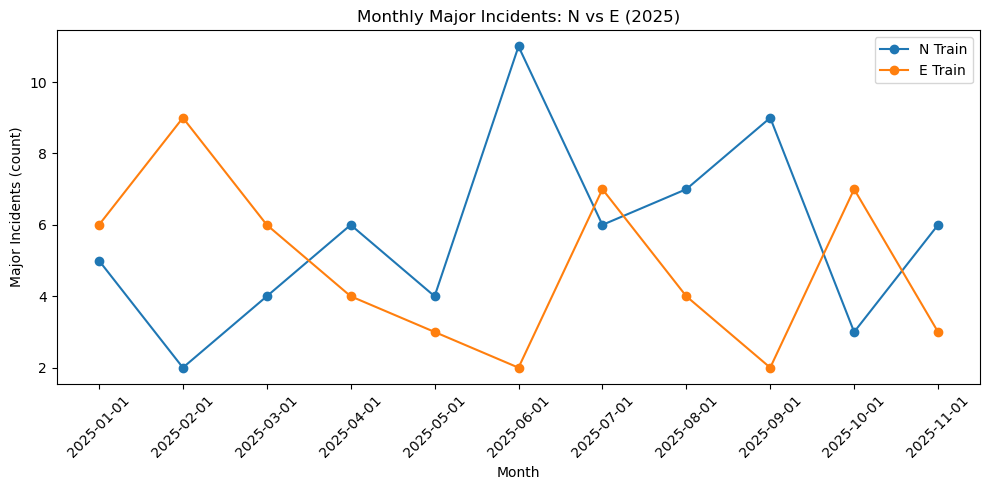

In [72]:
ne_pivot = ne_pivot.copy()
ne_pivot.index = ne_pivot.index.astype(str)

plt.figure(figsize=(10,5))
plt.plot(ne_pivot.index, ne_pivot['N'], marker='o', label='N Train')
plt.plot(ne_pivot.index, ne_pivot['E'], marker='o', label='E Train')
plt.title('Monthly Major Incidents: N vs E (2025)')
plt.xlabel('Month')
plt.ylabel('Major Incidents (count)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Insight 8

An interesting pattern emerges when comparing the N and E trains month-by-month. Periods of elevated disruptions on the N line often coincide with relative stability on the E line, while months where the E train struggles show fewer incidents on the N. This alternating pattern highlights how major delays tend to concentrate on individual lines rather than affecting the entire subway system at once.

# Final Synthesis & Project Conclusion

## What drives major subway incidents in NYC?

This analysis examined MTA Subway Major Incidents in 2025 to understand which factors most strongly influence service disruptions, how those disruptions vary by time, and how they differ across train lines.

### Key Findings
<ul>
    <li>A small number of categories drive most incidents
Persons on Trackbed/Police/Medical and Signals together account for over 50% of all major incidents, indicating that human-related disruptions and signal reliability are the primary drivers of service instability.</li>
<li>Weekday service is disproportionately affected
Incidents occur far more frequently on weekdays than weekends, suggesting that peak ridership, congestion, and operational strain significantly increase disruption risk.</li>
<li>Monthly spikes are line-specific rather than system-wide
While certain months show higher overall incident counts, these spikes are not evenly shared across all subway lines. Instead, disruption intensity shifts between individual lines over time.</li>
<li> N vs E train comparison reveals contrasting disruption patterns
A clear inverse relationship emerges between the N and E trains: months with elevated incidents on one line often coincide with relative stability on the other. This pattern suggests that infrastructure conditions, maintenance cycles, or operational constraints affect lines independently, rather than triggering network-wide failures.</li>
</ul>

# Final Insight

## Major subway disruptions in NYC are driven less by random events and more by recurring, predictable stress points—particularly signal failures and trackbed intrusions. These disruptions rotate across lines over time, highlighting the importance of targeted, line-specific interventions rather than broad system-wide solutions.